**IMPORTANT:** make sure that you have the newest version of pandas (0.18 or higher) by running the following command (in the terminal):
* sudo pip3 install pandas --upgrade

# Pandas and Statsmodels
## Completing your data analysis workflow

We will use pandas and statsmodels today to show how the data analysis can be done completely in Python. 

Pandas is a package that allows us to work with datasets in a similar manner as in R (with dataframes) and, according to their own website, has the objective of becoming **the most powerful and flexible open source data analysis / manipulation tool available in any language**. 

It's up to you to decide whether that is (already) true or not, but this tutorial will demonstrate some of its capabilities. We also use statsmodels to do some of the statistical analysis, in a workflow integrated with Pandas.

## Importing the packages (or installing them, if needed)
First we import the pandas (usually imported as "pd"), and statsmodels/numpy. We also use matplotlib for some visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import numpy as np

### Troubleshooting notes 

If you don't have these packages already, use pip3 to install them (using the terminal):
* sudo pip3 install numpy
* sudo pip3 install patsy
* sudo pip3 install pandas
* sudo pip3 install matplotlib
* sudo pip3 install statsmodels

If you get a gcc-error when installing any of the packages, run (in the terminal):
* sudo apt-get install python3-dev



In [2]:
%matplotlib inline

# Loading (or creating) data for Pandas

One of the key advantages of Pandas is how flexible it is in terms of types of data or files that it can load, and that it can save into. But first, we can also simply create the data from scratch.

For example, we can create a dataframe from lists.

In [3]:
names = ['John', 'Mary', 'Stefan', 'Cristina']
ages = [18, 20, 33, 19]

In [4]:
names_and_ages = list(zip(names, ages))

In [5]:
names_and_ages

[('John', 18), ('Mary', 20), ('Stefan', 33), ('Cristina', 19)]

In [6]:
df = pd.DataFrame(data = names_and_ages, columns = ['name', 'age'])

In this case, the dataframe that we created was called df. We could have used any other name - although in several tutorial and in stackexchange, usually people call a generic dataframe given as example as df.

To see how the dataframe looks like, we can simply call it again (like any Python element).

In [7]:
df

,name,age
0,John,18
1,Mary,20
2,Stefan,33
3,Cristina,19


We can also use a list of dictionaries to create a dataframe. The advantage here is that Pandas automatically recognizes the keys in the dictionaries as being the column names. This can be especially handy when working with JSON, and data acquired via APIs.

In [8]:
people = [
    {'name': 'John', 'age' : 20 , 'profession' : 'student', 'salary' : 10000},
    {'name': 'Mary', 'age' : 33 , 'profession' : 'journalist', 'salary' : 50000},
    {'name': 'Stefan', 'age' : 40, 'profession' : 'researcher', 'monthly_salary': 1500 },
    {'name': 'Cristina', 'age' : 18, 'profession' : 'webmaster', 'salary' : 25000},
    {'name': 'Joost', 'age' :22 , 'profession' : 'data scientist', 'salary' : 70000},
    {'name': 'Sandra', 'age' : 34, 'profession' : 'journalist', 'salary' : 55000},
    {'name': 'Marina', 'age' : 50, 'profession' : 'researcher', 'salary' : 45000 },
    
    
]

In [9]:
df = pd.DataFrame(people)

In [10]:
df

,age,monthly_salary,name,profession,salary
0,20,NaN,John,student,10000.0
1,33,NaN,Mary,journalist,50000.0
2,40,1500.0,Stefan,researcher,NaN
3,18,NaN,Cristina,webmaster,25000.0
4,22,NaN,Joost,data scientist,70000.0
5,34,NaN,Sandra,journalist,55000.0
6,50,NaN,Marina,researcher,45000.0


Note how Stefan has a NaN in the salary column, and everybody else has a NaN in the monthly_salary column. The dictionary above only had Stefan with the key "monthly_salary", while everybody else had only "salary". Pandas treated everything that it could not find as missing data (NaN, which stands for "Not a Number").

# Loading data into pandas

Pandas has several ways to load (or create) dataframes. You can read files (e.g., read_csv, read_excel, read_json), or even connect to databases. Likewise, you can save data in all these formats. For our tutorial, we will use a dataset of tweets collected from company accounts across several countries. 

The dataset is actually much larger than this (6M tweets and counting), but here we will use a random sample of 10K tweets.

In [11]:
tweets = pd.read_csv('brand_tweets_bdaca.csv')

One of the easiest ways to see what the dataset contains is to simply call the dataframe

In [12]:
tweets

,Unnamed: 0,utweet_id,company,screenname,country,idv,mas,uai,revenues,statuses_count,followers_count,created_at,animated_gif,video,photo,has_hash,is_reply,is_retweet,rts
0,11483,u335958575551762432,Sony,sonythailand,Thailand,20.0,34.0,64.0,74724,4229,9483,Sun May 19 03:22:20 +0000 2013,0,0,0,0,0,0,1.0
1,10746,u702617817607176192,Telefonica,telefonicacomar,Argentina,46.0,56.0,86.0,66826,316810,39263,Wed Feb 24 22:15:16 +0000 2016,0,0,0,0,1,0,0.0
2,27811,u238612933154832384,Cisco Systems,cisco_ch,Switzerland,68.0,70.0,58.0,47142,4043,1999,Thu Aug 23 12:25:31 +0000 2012,0,0,0,0,0,0,0.0
3,10791,u562896353882542082,Twenty-First Century Fox,20thcfoxkr,South Korea,18.0,39.0,85.0,31867,3730,22878,Wed Feb 04 08:52:03 +0000 2015,0,0,0,1,0,0,7.0
4,35663,u581055513078566913,Nissan Motor,nissande,Germany,67.0,66.0,65.0,103459,3195,3887,Thu Mar 26 11:30:04 +0000 2015,0,0,1,1,0,0,0.0
5,22172,u26083514675888128,Renault,renault_japon,Japan,46.0,95.0,92.0,54460,3984,12712,Sat Jan 15 01:09:29 +0000 2011,0,0,0,1,0,0,0.0
6,10076,u629650515815755776,Vinci,vinciautoroutes,France,71.0,43.0,86.0,51992,10296,9565,Fri Aug 07 13:49:15 +0000 2015,0,0,0,0,1,0,1.0
7,38356,u672681422000365568,EXOR Group,fiatontheweb,Italy,76.0,70.0,75.0,162163,11909,88879,Fri Dec 04 07:38:43 +0000 2015,0,0,0,1,1,0,2.0
8,3355,u468864296303480832,EXOR Group,fiatbr,Brazil,38.0,49.0,76.0,162163,11098,91975,Tue May 20 21:22:13 +0000 2014,0,0,0,1,1,0,0.0
9,26670,u709929423051563009,Unilever,knorrbrasil,Brazil,38.0,49.0,76.0,64251,5532,18442,Wed Mar 16 02:28:58 +0000 2016,0,0,0,1,1,0,1.0


The unnamed column does not seem to be that useful, so we can drop it. As a note, axis=1 means that we are dropping a column

In [13]:
tweets = tweets.drop(['Unnamed: 0'], axis=1)

In [14]:
tweets

,utweet_id,company,screenname,country,idv,mas,uai,revenues,statuses_count,followers_count,created_at,animated_gif,video,photo,has_hash,is_reply,is_retweet,rts
0,u335958575551762432,Sony,sonythailand,Thailand,20.0,34.0,64.0,74724,4229,9483,Sun May 19 03:22:20 +0000 2013,0,0,0,0,0,0,1.0
1,u702617817607176192,Telefonica,telefonicacomar,Argentina,46.0,56.0,86.0,66826,316810,39263,Wed Feb 24 22:15:16 +0000 2016,0,0,0,0,1,0,0.0
2,u238612933154832384,Cisco Systems,cisco_ch,Switzerland,68.0,70.0,58.0,47142,4043,1999,Thu Aug 23 12:25:31 +0000 2012,0,0,0,0,0,0,0.0
3,u562896353882542082,Twenty-First Century Fox,20thcfoxkr,South Korea,18.0,39.0,85.0,31867,3730,22878,Wed Feb 04 08:52:03 +0000 2015,0,0,0,1,0,0,7.0
4,u581055513078566913,Nissan Motor,nissande,Germany,67.0,66.0,65.0,103459,3195,3887,Thu Mar 26 11:30:04 +0000 2015,0,0,1,1,0,0,0.0
5,u26083514675888128,Renault,renault_japon,Japan,46.0,95.0,92.0,54460,3984,12712,Sat Jan 15 01:09:29 +0000 2011,0,0,0,1,0,0,0.0
6,u629650515815755776,Vinci,vinciautoroutes,France,71.0,43.0,86.0,51992,10296,9565,Fri Aug 07 13:49:15 +0000 2015,0,0,0,0,1,0,1.0
7,u672681422000365568,EXOR Group,fiatontheweb,Italy,76.0,70.0,75.0,162163,11909,88879,Fri Dec 04 07:38:43 +0000 2015,0,0,0,1,1,0,2.0
8,u468864296303480832,EXOR Group,fiatbr,Brazil,38.0,49.0,76.0,162163,11098,91975,Tue May 20 21:22:13 +0000 2014,0,0,0,1,1,0,0.0
9,u709929423051563009,Unilever,knorrbrasil,Brazil,38.0,49.0,76.0,64251,5532,18442,Wed Mar 16 02:28:58 +0000 2016,0,0,0,1,1,0,1.0


We can also check which columns the dataset contains.

In [15]:
tweets.columns

Index(['utweet_id', 'company', 'screenname', 'country', 'idv', 'mas', 'uai',
       'revenues', 'statuses_count', 'followers_count', 'created_at',
       'animated_gif', 'video', 'photo', 'has_hash', 'is_reply', 'is_retweet',
       'rts'],
      dtype='object')

As a note, the columns in the dataset mean the following:
* utweet_id: Unique ID of the tweet
* company: Company name
* screenname: Twitter name of the company account
* country: Country in which the company account is (mostly) active
* idv, mas & uai: Hofstede's classification for Individualism, Masculinity & Uncertainty Avoidance of the given country
* revenues: Revenues of the company
* statuses_count: Total number of tweets that the company account has published
* followers_count: Total number of followers that the company account has
* created_at: Date and time in which the tweet was created
* animated_gif, video, photo: Number of animated gifs, videos or photos published in the tweet
* has_hash: Whether the tweet has a hashtag in the text
* is_retweet: Whether the tweet is actually a retweet from someone else's account
* is_reply: Whether the tweet is a reply to another user
* rts: number of retweets that that tweet received

As a note, the actual text is not included (to reduce the file size)

## Saving the dataset

We made a small modification to the dataset, so we can save it. Pandas offers several formats to read/write data (see http://pandas.pydata.org/pandas-docs/stable/io.html). We'll use csv this time.

In [16]:
tweets.to_csv('brand_tweets_bdaca_corrected.csv')

# Exploring the dataset

Pandas allows for a lot of exploratory analyses to be done directly with built-in functions.

For example, getting descriptives of numerical variables

In [17]:
tweets.describe()

,idv,mas,uai,revenues,statuses_count,followers_count,animated_gif,video,photo,has_hash,is_reply,is_retweet,rts
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,51.788900,51.461600,78.151100,70832.965200,3.247247e+04,9.013754e+04,0.008100,0.002000,0.27760,0.428900,0.327700,0.096000,9.591700
std,18.570273,18.005303,13.774391,54273.496448,1.402006e+05,3.781133e+05,0.089639,0.044679,0.54034,0.494944,0.469398,0.294606,170.766229
min,14.000000,5.000000,23.000000,24428.000000,1.300000e+01,1.300000e+01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,42.000000,75.000000,35545.000000,2.429000e+03,3.272000e+03,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,49.000000,82.000000,57070.000000,4.529000e+03,1.252500e+04,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,66.000000,86.000000,74724.000000,1.076900e+04,4.532100e+04,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,2.000000
max,80.000000,95.000000,112.000000,485651.000000,1.870787e+06,5.847287e+06,1.000000,1.000000,4.00000,1.000000,1.000000,1.000000,12306.000000


Or getting frequencies from categorical variables 

In [18]:
tweets['screenname'].value_counts()

pln_123            65
itau               58
telefonicacomar    42
orange_es          39
movistararg        37
vodafone_es        34
vodafonenl         34
bouyguestelecom    33
bbvabancomerre     32
vivoemrede         31
playstationfr      31
clarobrasil        30
casasbahia         30
familiaextra       29
claroargentina     29
samsungbrasil      28
vodafoneit         28
db_bahn            28
nissanfrance       28
cocacola_br        27
samsung_nl         26
pontofrio          26
bradesco           25
movistar_es        24
vodafone_de        24
bancodobrasil      24
airfrancefr        23
bbvabancomer       23
arriva_nl          22
samsungfr          22
                   ..
unipolsai           1
unilevernl          1
btletstalk_bnl      1
schneiderelec       1
actimel_italia      1
garnierpt           1
bayer4cropsru       1
suzukisuisse        1
edfcruasmeysse      1
fiatfr              1
unicredit_czsk      1
accenturenl         1
tagheuer            1
sonypicturesch      1
albertcesk

You can also group by a given category, and get the descriptives

In [20]:
tweets.groupby(['company']).describe()

animated_gif  followers_count   has_hash  \
company                                                                         
3M                            count          60.0        60.000000  60.000000   
                              mean            0.0     13520.066667   0.283333   
                              std             0.0     12814.268398   0.454420   
                              min             0.0       496.000000   0.000000   
                              25%             0.0      2597.000000   0.000000   
                              50%             0.0      7896.000000   0.000000   
                              75%             0.0     34057.000000   1.000000   
                              max             0.0     34057.000000   1.000000   
A.P. Mu00f8ller-Mu00e6rsk A/S count           2.0         2.000000   2.000000   
                              mean            0.0    119176.000000   1.000000   
                              std             0.0         0.000000   0.000000   
                              min             0.0    119176.000000   1.000000   
                              25%             0.0    119176.000000   1.000000   
                              50%             0.0    119176.000000   1.000000   
                              75%             0.0    119176.000000   1.000000   
                              max             0.0    119176.000000   1.000000   
ABB                           count          73.0        73.000000  73.000000   
                              mean            0.0      3312.794521   0.726027   
                              std             0.0     12186.022415   0.449082   
                              min             0.0       730.000000   0.000000   
                              25%             0.0      1104.000000   0.000000   
                              50%             0.0      1147.000000   1.000000   
                              75%             0.0      3136.000000   1.000000   
                              max             0.0    105571.000000   1.000000   
ACS                           count           5.0         5.000000   5.000000   
                              mean            0.0      1822.000000   0.400000   
                              std             0.0         0.000000   0.547723   
                              min             0.0      1822.000000   0.000000   
                              25%             0.0      1822.000000   0.000000   
                              50%             0.0      1822.000000   0.000000   
...                                           ...              ...        ...   
Walmart                       std             0.0    130979.626140   0.377195   
                              min             0.0      2925.000000   0.000000   
                              25%             0.0      5952.000000   0.000000   
                              50%             0.0    131459.000000   0.000000   
                              75%             0.0    302322.000000   0.000000   
                              max             0.0    302322.000000   1.000000   
ZF Friedrichshafen            count          18.0        18.000000  18.000000   
                              mean            0.0      1056.333333   0.888889   
                              std             0.0       402.124066   0.323381   
                              min             0.0       780.000000   0.000000   
                              25%             0.0       780.000000   1.000000   
                              50%             0.0       780.000000   1.000000   
                              75%             0.0      1609.000000   1.000000   
                              max             0.0      1609.000000   1.000000   
Zurich Insurance Group        count           1.0         1.000000   1.000000   
                              mean            0.0     28803.000000   0.000000   
                              std             NaN              NaN  

Or just get the means of a specific column.

In [23]:
tweets[['rts', 'company']].groupby(['company']).mean().to_csv('mean_rts_per_company.csv')

To be clearer, in the previous step, we actually selected two columns of the dataframe when we requested tweets[['rts', 'screenname']]. We can also simply create a smaller dataframe with just a few columns of the larger dataframe, and then later perform operations.

In [24]:
subdf1 = tweets[['screenname', 'company']]

In [25]:
subdf1

,screenname,company
0,sonythailand,Sony
1,telefonicacomar,Telefonica
2,cisco_ch,Cisco Systems
3,20thcfoxkr,Twenty-First Century Fox
4,nissande,Nissan Motor
5,renault_japon,Renault
6,vinciautoroutes,Vinci
7,fiatontheweb,EXOR Group
8,fiatbr,EXOR Group
9,knorrbrasil,Unilever


We can also filter the dataframe. Say that we are only interested in the tweets from Germany.

In [27]:
tweets[tweets['country'] == 'Germany']

,utweet_id,company,screenname,country,idv,mas,uai,revenues,statuses_count,followers_count,created_at,animated_gif,video,photo,has_hash,is_reply,is_retweet,rts
4,u581055513078566913,Nissan Motor,nissande,Germany,67.0,66.0,65.0,103459,3195,3887,Thu Mar 26 11:30:04 +0000 2015,0,0,1,1,0,0,0.0
11,u567357383757017090,Pfizer,pfizer_de,Germany,67.0,66.0,65.0,49605,982,1230,Mon Feb 16 16:18:35 +0000 2015,0,0,1,0,0,0,1.0
68,u587179628697116672,Munich Re,ergodirekt,Germany,67.0,66.0,65.0,81685,7274,14012,Sun Apr 12 09:05:07 +0000 2015,0,0,0,1,0,0,1.0
80,u451717351604367360,BT Group,btgermany,Germany,67.0,66.0,65.0,28928,650,218,Thu Apr 03 13:46:24 +0000 2014,0,0,1,1,0,0,0.0
84,u13629826474,TUI,tuicruises,Germany,67.0,66.0,65.0,25385,2926,4090,Sat May 08 21:31:31 +0000 2010,0,0,0,1,0,0,0.0
107,u597497569183408128,L'Oreal,maybellineny_de,Germany,67.0,66.0,65.0,29889,1375,8947,Sun May 10 20:24:56 +0000 2015,0,0,0,1,0,0,0.0
113,u591553307811938304,Energie Baden-Wu00fcrttemberg,enbw,Germany,67.0,66.0,65.0,27860,2540,7176,Fri Apr 24 10:44:33 +0000 2015,0,0,0,0,0,0,1.0
126,u693450159359926272,L'Oreal,essie_de,Germany,67.0,66.0,65.0,29889,2906,10904,Sat Jan 30 15:06:16 +0000 2016,0,0,1,1,0,0,7.0
139,u494529112283705344,ZF Friedrichshafen,zf_konzern,Germany,67.0,66.0,65.0,24428,893,1609,Wed Jul 30 17:05:02 +0000 2014,0,0,0,1,0,0,0.0
181,u608195232014979072,Bosch,boschpresse,Germany,67.0,66.0,65.0,64961,5296,5194,Tue Jun 09 08:53:37 +0000 2015,0,0,0,1,0,1,2.0


## Visualizing the data

We can also run some quick data visualizations. For more information, see: http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html

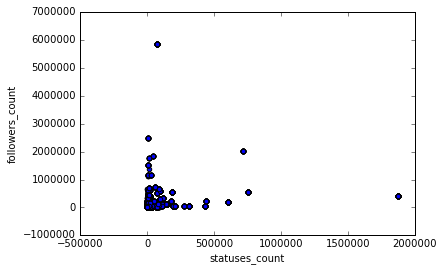

In [28]:
tweets.plot.scatter(x='statuses_count', y='followers_count', c='blue')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ab3710>]], dtype=object)

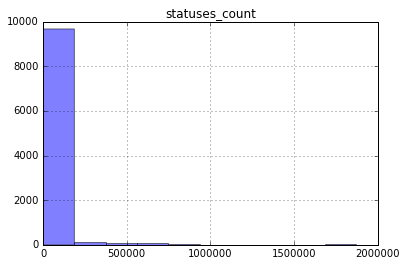

In [29]:
tweets.hist(column='statuses_count', alpha=.5, bins=10)

For some of the visualizations, we can ask several plots to be done at the same time. For example, we may want a histogram of statuses_count for each country.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d1b1f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122c8bda0>]], dtype=object)

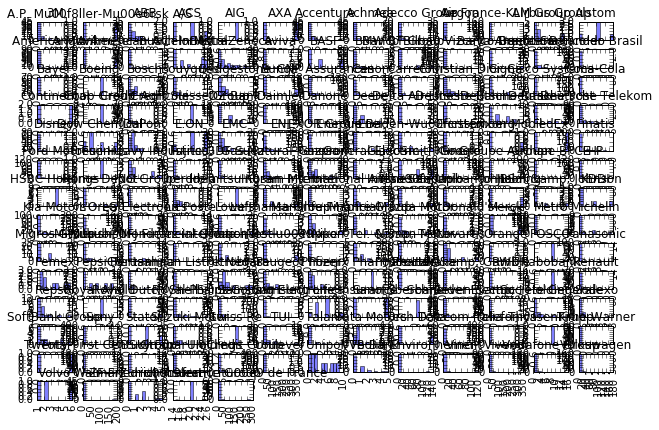

In [32]:
tweets.hist(column='rts', by=['company'], alpha=.5, bins=10, figsize=(10,7))

# Running statistical tests

While you could export the dataframe to CSV (or even to a STATA format) and to the statistical analysis elsewhere, Pandas & Statsmodels/Numpy allow you to do a lot of it in the same workflow. 

The examples below are just very small set of what these packages can do. To know more, check:
* Pandas Computational Tools: http://pandas.pydata.org/pandas-docs/stable/computation.html
* Statsmodels documentation: http://statsmodels.sourceforge.net/


In [33]:
tweets.corr()

,idv,mas,uai,revenues,statuses_count,followers_count,animated_gif,video,photo,has_hash,is_reply,is_retweet,rts
idv,1.000000,-0.116127,-0.159226,0.018903,-0.052293,-0.085219,0.010340,-0.010219,0.016625,0.117182,-0.000037,0.100737,-0.003281
mas,-0.116127,1.000000,0.249254,0.034251,-0.050461,0.026511,-0.001201,-0.013580,0.038966,0.071972,-0.115275,0.004372,0.047522
uai,-0.159226,0.249254,1.000000,0.006796,-0.063770,0.002465,0.027277,0.008447,0.074462,0.072246,-0.107689,0.050225,0.030856
revenues,0.018903,0.034251,0.006796,1.000000,-0.043919,0.011912,0.007755,-0.000307,0.038881,0.012436,0.009072,-0.001890,-0.001984
statuses_count,-0.052293,-0.050461,-0.063770,-0.043919,1.000000,0.163067,-0.009514,-0.006923,-0.090524,-0.156621,0.266020,-0.058474,-0.006714
followers_count,-0.085219,0.026511,0.002465,0.011912,0.163067,1.000000,-0.000367,0.002926,-0.029299,-0.098720,0.171647,-0.037121,0.051810
animated_gif,0.010340,-0.001201,0.027277,0.007755,-0.009514,-0.000367,1.000000,-0.004045,-0.046428,0.068210,0.031984,-0.021874,-0.002339
video,-0.010219,-0.013580,0.008447,-0.000307,-0.006923,0.002926,-0.004045,1.000000,-0.023000,0.042612,-0.031254,0.031000,0.009401
photo,0.016625,0.038966,0.074462,0.038881,-0.090524,-0.029299,-0.046428,-0.023000,1.000000,0.263031,-0.309017,0.150469,0.037060
has_hash,0.117182,0.071972,0.072246,0.012436,-0.156621,-0.098720,0.068210,0.042612,0.263031,1.000000,-0.425525,0.133922,0.011781


We can also do T-Tests. The results return the test statistic, p-value, and the degrees of freedom. 

Here, notice that we are using the ability to filter a dataframe (e.g., *tweets[tweets['country'] == 'Brazil']*  creates a dataframe only with Brazil as a country; adding *['rts']* at the end selects only the column for rts).

In [34]:
from statsmodels.stats.weightstats import ttest_ind

In [35]:
ttest_ind(tweets[tweets['country'] == 'Brazil']['rts'], 
          tweets[tweets['country'] == 'Netherlands']['rts'])

(1.7910899225030654, 0.073447483773294658, 1793.0)

We can also do an OLS regression. In order to do so, we need to define a model and then run it. When defining the model, you create the equation in the following manner:
* First you include your dependent variable, followed by the ~ sign
* Then you include the independent variables (separated by the + sign)

In [36]:
from statsmodels.formula.api import ols

In [37]:
model = 'rts ~ photo + video + followers_count'

In [38]:
regression = ols(formula=model, data=tweets).fit()

In [39]:
print(regression.params)

Intercept           3.952152
photo              12.275922
video              38.752945
followers_count     0.000024
dtype: float64


In [40]:
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    rts   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.31
Date:                Mon, 23 May 2016   Prob (F-statistic):           2.66e-09
Time:                        10:25:44   Log-Likelihood:                -65570.
No. Observations:               10000   AIC:                         1.311e+05
Df Residuals:                    9996   BIC:                         1.312e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           3.9522      1.966     

You can also run a series of models in a for loop, for example.

In [41]:
base_model = 'rts ~ followers_count'
independent_variables = ['statuses_count', 'uai', 'idv', 'mas', 'photo', 'video', 'animated_gif']

In [42]:
models = []
models.append(sm.formula.api.ols(formula=base_model, data=tweets).fit())

In [44]:
models

In [45]:
i = 0
for iv in independent_variables:
    base_model += '+ ' + iv
    models.append(sm.formula.api.ols(formula=base_model, data=tweets).fit())


In [46]:
for model in models:
    print(model.summary())
    print('\n\n')

                            OLS Regression Results                            
Dep. Variable:                    rts   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.91
Date:                Mon, 23 May 2016   Prob (F-statistic):           2.17e-07
Time:                        10:28:25   Log-Likelihood:                -65578.
No. Observations:               10000   AIC:                         1.312e+05
Df Residuals:                    9998   BIC:                         1.312e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           7.4826      1.753     

# More information

If you are interested in using Python for your statistical analyses, you may want to consult:
* 10-minute video showcasing the possibilities of Pandas: https://vimeo.com/59324550
* Doing time series analyses in Pandas: http://earthpy.org/pandas-basics.html & http://statsmodels.sourceforge.net/stable/vector_ar.html#var
* And doing a deep dive in the Pandas documentation :-) http://pandas.pydata.org/